Problem 1)

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import numpy as np
import os

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sample dataset (English-French sentence pairs)
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]

# Tokenizer function
def tokenize(sentence):
    return sentence.lower().split()

# Build vocabulary
def build_vocab(sentences):
    vocab = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>": 3}
    for sentence in sentences:
        for word in tokenize(sentence):
            if word not in vocab:
                vocab[word] = len(vocab)
    return vocab

# Create English and French vocabularies
english_sentences = [pair[0] for pair in english_to_french]
french_sentences = [pair[1] for pair in english_to_french]

english_vocab = build_vocab(english_sentences)
french_vocab = build_vocab(french_sentences)

# Reverse French vocabulary for decoding
idx_to_french = {idx: word for word, idx in french_vocab.items()}

# Encode sentences as tensors
def encode_sentence(sentence, vocab):
    return torch.tensor([vocab.get(word, vocab["<UNK>"]) for word in tokenize(sentence)], dtype=torch.long)

# Custom dataset
class TranslationDataset(Dataset):
    def __init__(self, english_sentences, french_sentences, english_vocab, french_vocab):
        self.english_sentences = [torch.cat((torch.tensor([english_vocab["<SOS>"]]), encode_sentence(sent, english_vocab), torch.tensor([english_vocab["<EOS>"]]))) for sent in english_sentences]
        self.french_sentences = [torch.cat((torch.tensor([french_vocab["<SOS>"]]), encode_sentence(sent, french_vocab), torch.tensor([french_vocab["<EOS>"]]))) for sent in french_sentences]

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        return self.english_sentences[idx], self.french_sentences[idx]

# Collate function for padding
def collate_fn(batch):
    english_sentences, french_sentences = zip(*batch)
    english_lengths = torch.tensor([len(sent) for sent in english_sentences])
    french_lengths = torch.tensor([len(sent) for sent in french_sentences])

    english_padded = pad_sequence(english_sentences, padding_value=english_vocab["<PAD>"])
    french_padded = pad_sequence(french_sentences, padding_value=french_vocab["<PAD>"])

    return english_padded, english_lengths, french_padded, french_lengths

# Hyperparameters
input_size = len(english_vocab)
output_size = len(french_vocab)
hidden_size = 256
num_epochs = 50
batch_size = 1
learning_rate = 0.006
checkpoint_dir = "checkpoints"

os.makedirs(checkpoint_dir, exist_ok=True)

# Load dataset
dataset = TranslationDataset(english_sentences, french_sentences, english_vocab, french_vocab)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size   # 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)


# Encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), enforce_sorted=False)
        outputs, hidden = self.gru(packed)
        outputs, _ = pad_packed_sequence(outputs)
        return outputs, hidden

# Decoder
class Decoder(nn.Module):
    def __init__(self, output_size, hidden_size):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = x.unsqueeze(0)
        embedded = self.embedding(x)
        output, hidden = self.gru(embedded, hidden)
        output = self.fc(output.squeeze(0))
        return output, hidden

encoder = Encoder(input_size, hidden_size).to(device)
decoder = Decoder(output_size, hidden_size).to(device)

criterion = nn.CrossEntropyLoss()
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)

# Training Function
def train():
    encoder.train()
    decoder.train()
    total_loss = 0

    for english_padded, english_lengths, french_padded, french_lengths in train_dataloader:
        english_padded, english_lengths = english_padded.to(device), english_lengths.to(device)
        french_padded, french_lengths = french_padded.to(device), french_lengths.to(device)

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        # Forward pass through encoder
        encoder_outputs, hidden = encoder(english_padded, english_lengths)

        # Adjust hidden state to match batch size
        hidden = hidden.expand(-1, english_padded.shape[1], -1).contiguous()

        decoder_input = torch.full((batch_size, 1), french_vocab["<SOS>"], device=device, dtype=torch.long)
        loss = 0

        for t in range(french_padded.size(0)):
            decoder_output, hidden = decoder(decoder_input.squeeze(1), hidden)
            loss += criterion(decoder_output, french_padded[t])
            decoder_input = french_padded[t].unsqueeze(1)

        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()

        total_loss += loss.item() / french_padded.size(0)

    return total_loss / len(train_dataloader)


# Validation function with accuracy calculation
def validate():
    encoder.eval()
    decoder.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for english_padded, english_lengths, french_padded, french_lengths in val_dataloader:
            english_padded, english_lengths = english_padded.to(device), english_lengths.to(device)
            french_padded, french_lengths = french_padded.to(device), french_lengths.to(device)

            encoder_outputs, hidden = encoder(english_padded, english_lengths)
            hidden = hidden.expand(-1, english_padded.shape[1], -1).contiguous()

            decoder_input = torch.full((batch_size, 1), french_vocab["<SOS>"], device=device, dtype=torch.long)

            loss = 0
            predicted_sentence = []

            for t in range(french_padded.size(0)):
                decoder_output, hidden = decoder(decoder_input.squeeze(1), hidden)
                loss += criterion(decoder_output, french_padded[t])
                decoder_input = french_padded[t].unsqueeze(1)

                # Get the top prediction and compare it with the target token
                _, topi = decoder_output.topk(1)
                predicted_sentence.append(topi.item())
                total_predictions += 1
                if topi.item() == french_padded[t].item():
                    correct_predictions += 1

            total_loss += loss.item() / french_padded.size(0)

    accuracy = correct_predictions / total_predictions * 100 if total_predictions > 0 else 0
    return total_loss / len(val_dataloader), accuracy


# Training loop with accuracy printout
for epoch in range(num_epochs):
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")
    train_loss = train()
    val_loss, val_accuracy = validate()
    print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")


# Translation function
def translate(input_sentence):
    input_tensor = torch.tensor([english_vocab.get(word, english_vocab["<UNK>"]) for word in tokenize(input_sentence)], dtype=torch.long).unsqueeze(1).to(device)
    encoder_outputs, hidden = encoder(input_tensor, torch.tensor([len(input_tensor)]).to(device))

    # Prepare the initial input for the decoder (SOS token)
    decoder_input = torch.full((1, 1), french_vocab["<SOS>"], device=device, dtype=torch.long)

    translated_sentence = []
    for t in range(50):  # Limit the max length of the translation to 50 tokens
        decoder_output, hidden = decoder(decoder_input.squeeze(1), hidden)
        _, topi = decoder_output.topk(1)
        decoder_input = topi.squeeze(1).unsqueeze(0)
        
        word = idx_to_french.get(decoder_input.item(), "<UNK>")
        translated_sentence.append(word)
        
        if word == "<EOS>":
            break

    return ' '.join(translated_sentence)


# Example translations
for eng, _ in english_to_french[:5]:
    print(f"{eng} → {translate(eng)}")



Epoch [1/50]
Train Loss: 4.4412, Val Loss: 4.4263, Val Accuracy: 34.81%

Epoch [2/50]
Train Loss: 2.7412, Val Loss: 4.9371, Val Accuracy: 38.61%

Epoch [3/50]
Train Loss: 1.6394, Val Loss: 5.2293, Val Accuracy: 36.08%

Epoch [4/50]
Train Loss: 1.3432, Val Loss: 5.0001, Val Accuracy: 37.97%

Epoch [5/50]
Train Loss: 1.0009, Val Loss: 5.3078, Val Accuracy: 37.34%

Epoch [6/50]
Train Loss: 0.7595, Val Loss: 5.3958, Val Accuracy: 36.71%

Epoch [7/50]
Train Loss: 0.4619, Val Loss: 5.3738, Val Accuracy: 39.24%

Epoch [8/50]
Train Loss: 0.3373, Val Loss: 5.2746, Val Accuracy: 38.61%

Epoch [9/50]
Train Loss: 0.1474, Val Loss: 5.2429, Val Accuracy: 38.61%

Epoch [10/50]
Train Loss: 0.0741, Val Loss: 5.4157, Val Accuracy: 38.61%

Epoch [11/50]
Train Loss: 0.0353, Val Loss: 5.5471, Val Accuracy: 39.24%

Epoch [12/50]
Train Loss: 0.0107, Val Loss: 5.5442, Val Accuracy: 39.24%

Epoch [13/50]
Train Loss: 0.0034, Val Loss: 5.5491, Val Accuracy: 39.24%

Epoch [14/50]
Train Loss: 0.0026, Val Loss: 5.

Problem 2)

Using device: cuda
Max English sequence length: 9
Max French sequence length: 11
Using max sequence length: 16
English vocabulary size: 247
French vocabulary size: 272
Epoch: 1/50
	Train Loss: 5.5408
	Val. Loss: 5.3483
	Val. Accuracy: 22.40%
Epoch: 2/50
	Train Loss: 5.2731
	Val. Loss: 4.9206
	Val. Accuracy: 18.40%
Epoch: 3/50
	Train Loss: 4.9259
	Val. Loss: 4.8689
	Val. Accuracy: 18.40%
Epoch: 4/50
	Train Loss: 4.5259
	Val. Loss: 5.2073
	Val. Accuracy: 18.40%
Epoch: 5/50
	Train Loss: 4.3622
	Val. Loss: 5.0101
	Val. Accuracy: 30.40%
Epoch: 6/50
	Train Loss: 4.2138
	Val. Loss: 5.0523
	Val. Accuracy: 32.00%
Epoch: 7/50
	Train Loss: 4.0792
	Val. Loss: 5.1023
	Val. Accuracy: 32.00%
Epoch: 8/50
	Train Loss: 3.9804
	Val. Loss: 5.0271
	Val. Accuracy: 32.00%
Epoch: 9/50
	Train Loss: 3.8770
	Val. Loss: 4.9249
	Val. Accuracy: 32.00%
Epoch: 10/50
	Train Loss: 3.7652
	Val. Loss: 4.9134
	Val. Accuracy: 32.00%
Epoch: 11/50
	Train Loss: 3.6471
	Val. Loss: 4.9221
	Val. Accuracy: 32.80%
Epoch: 12/50
	Tr

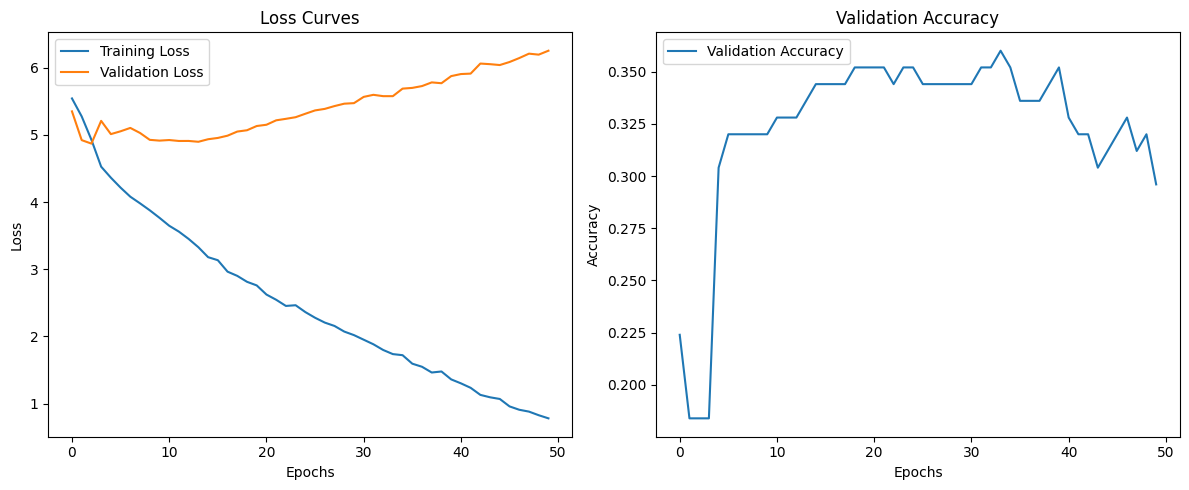


Sample English sentence: The sun sets in the evening
Reference French translation: Le soleil se couche le soir
Model translation: le oiseaux gazouillent le matin
Source tokens: ['SOS', 'the', 'sun', 'sets', 'in', 'the', 'evening', 'EOS']
Target tokens: ['SOS', 'le', 'oiseaux', 'gazouillent', 'le', 'matin', 'EOS']
Attention shape: torch.Size([5, 16])


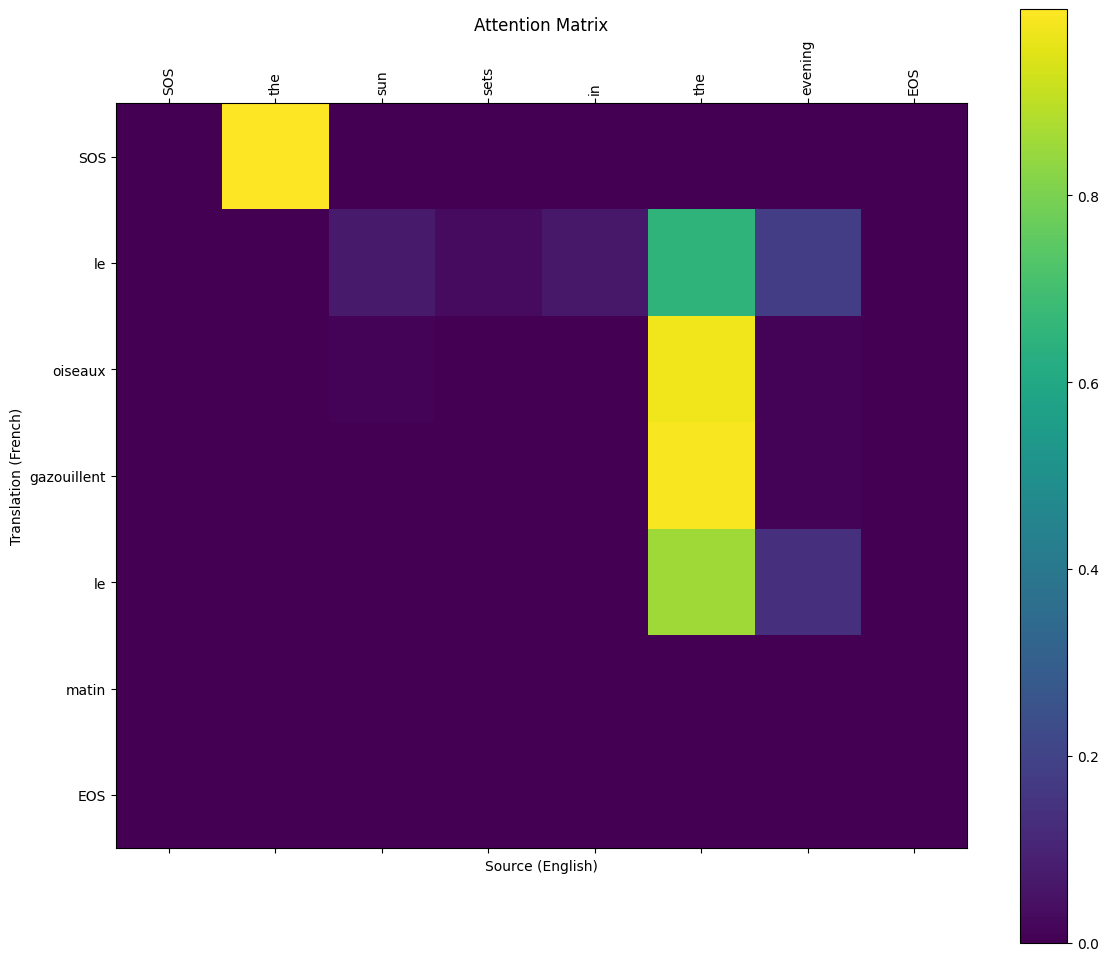


Token alignment:
SOS             → the
le              → the
oiseaux         → the
gazouillent     → the
le              → the
matin           → (no attention data)
EOS             → (no attention data)

Attention Visualization Details:
Source (English): SOS the sun sets in the evening EOS
Translation (French): SOS le oiseaux gazouillent le matin EOS

Training complete. Final metrics:
Final training loss: 0.7826
Final validation loss: 6.2506
Final validation accuracy: 29.60%


In [91]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import re
import ast
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Sample dataset (English-French sentence pairs)
english_to_french = [
    ("I am cold", "J'ai froid"),
    ("You are tired", "Tu es fatigué"),
    ("He is hungry", "Il a faim"),
    ("She is happy", "Elle est heureuse"),
    ("We are friends", "Nous sommes amis"),
    ("They are students", "Ils sont étudiants"),
    ("The cat is sleeping", "Le chat dort"),
    ("The sun is shining", "Le soleil brille"),
    ("We love music", "Nous aimons la musique"),
    ("She speaks French fluently", "Elle parle français couramment"),
    ("He enjoys reading books", "Il aime lire des livres"),
    ("They play soccer every weekend", "Ils jouent au football chaque week-end"),
    ("The movie starts at 7 PM", "Le film commence à 19 heures"),
    ("She wears a red dress", "Elle porte une robe rouge"),
    ("We cook dinner together", "Nous cuisinons le dîner ensemble"),
    ("He drives a blue car", "Il conduit une voiture bleue"),
    ("They visit museums often", "Ils visitent souvent des musées"),
    ("The restaurant serves delicious food", "Le restaurant sert une délicieuse cuisine"),
    ("We watch movies on Fridays", "Nous regardons des films le vendredi"),
    ("He listens to music while jogging", "Il écoute de la musique en faisant du jogging"),
    ("They travel around the world", "Ils voyagent autour du monde"),
    ("The book is on the table", "Le livre est sur la table"),
    ("She dances gracefully", "Elle danse avec grâce"),
    ("We celebrate birthdays with cake", "Nous célébrons les anniversaires avec un gâteau"),
    ("He works hard every day", "Il travaille dur tous les jours"),
    ("They speak different languages", "Ils parlent différentes langues"),
    ("The flowers bloom in spring", "Les fleurs fleurissent au printemps"),
    ("She writes poetry in her free time", "Elle écrit de la poésie pendant son temps libre"),
    ("We learn something new every day", "Nous apprenons quelque chose de nouveau chaque jour"),
    ("The dog barks loudly", "Le chien aboie bruyamment"),
    ("He sings beautifully", "Il chante magnifiquement"),
    ("They swim in the pool", "Ils nagent dans la piscine"),
    ("The birds chirp in the morning", "Les oiseaux gazouillent le matin"),
    ("She teaches English at school", "Elle enseigne l'anglais à l'école"),
    ("We eat breakfast together", "Nous prenons le petit déjeuner ensemble"),
    ("He paints landscapes", "Il peint des paysages"),
    ("They laugh at the joke", "Ils rient de la blague"),
    ("The clock ticks loudly", "L'horloge tic-tac bruyamment"),
    ("She runs in the park", "Elle court dans le parc"),
    ("We travel by train", "Nous voyageons en train"),
    ("He writes a letter", "Il écrit une lettre"),
    ("They read books at the library", "Ils lisent des livres à la bibliothèque"),
    ("The baby cries", "Le bébé pleure"),
    ("She studies hard for exams", "Elle étudie dur pour les examens"),
    ("We plant flowers in the garden", "Nous plantons des fleurs dans le jardin"),
    ("He fixes the car", "Il répare la voiture"),
    ("They drink coffee in the morning", "Ils boivent du café le matin"),
    ("The sun sets in the evening", "Le soleil se couche le soir"),
    ("She dances at the party", "Elle danse à la fête"),
    ("We play music at the concert", "Nous jouons de la musique au concert"),
    ("He cooks dinner for his family", "Il cuisine le dîner pour sa famille"),
    ("They study French grammar", "Ils étudient la grammaire française"),
    ("The rain falls gently", "La pluie tombe doucement"),
    ("She sings a song", "Elle chante une chanson"),
    ("We watch a movie together", "Nous regardons un film ensemble"),
    ("He sleeps deeply", "Il dort profondément"),
    ("They travel to Paris", "Ils voyagent à Paris"),
    ("The children play in the park", "Les enfants jouent dans le parc"),
    ("She walks along the beach", "Elle se promène le long de la plage"),
    ("We talk on the phone", "Nous parlons au téléphone"),
    ("He waits for the bus", "Il attend le bus"),
    ("They visit the Eiffel Tower", "Ils visitent la tour Eiffel"),
    ("The stars twinkle at night", "Les étoiles scintillent la nuit"),
    ("She dreams of flying", "Elle rêve de voler"),
    ("We work in the office", "Nous travaillons au bureau"),
    ("He studies history", "Il étudie l'histoire"),
    ("They listen to the radio", "Ils écoutent la radio"),
    ("The wind blows gently", "Le vent souffle doucement"),
    ("She swims in the ocean", "Elle nage dans l'océan"),
    ("We dance at the wedding", "Nous dansons au mariage"),
    ("He climbs the mountain", "Il gravit la montagne"),
    ("They hike in the forest", "Ils font de la randonnée dans la forêt"),
    ("The cat meows loudly", "Le chat miaule bruyamment"),
    ("She paints a picture", "Elle peint un tableau"),
    ("We build a sandcastle", "Nous construisons un château de sable"),
    ("He sings in the choir", "Il chante dans le chœur"),
    ("They ride bicycles", "Ils font du vélo"),
    ("The coffee is hot", "Le café est chaud"),
    ("She wears glasses", "Elle porte des lunettes"),
    ("We visit our grandparents", "Nous rendons visite à nos grands-parents"),
    ("He plays the guitar", "Il joue de la guitare"),
    ("They go shopping", "Ils font du shopping"),
    ("The teacher explains the lesson", "Le professeur explique la leçon"),
    ("She takes the train to work", "Elle prend le train pour aller au travail"),
    ("We bake cookies", "Nous faisons des biscuits"),
    ("He washes his hands", "Il se lave les mains"),
    ("They enjoy the sunset", "Ils apprécient le coucher du soleil"),
    ("The river flows calmly", "La rivière coule calmement"),
    ("She feeds the cat", "Elle nourrit le chat"),
    ("We visit the museum", "Nous visitons le musée"),
    ("He fixes his bicycle", "Il répare son vélo"),
    ("They paint the walls", "Ils peignent les murs"),
    ("The baby sleeps peacefully", "Le bébé dort paisiblement"),
    ("She ties her shoelaces", "Elle attache ses lacets"),
    ("We climb the stairs", "Nous montons les escaliers"),
    ("He shaves in the morning", "Il se rase le matin"),
    ("They set the table", "Ils mettent la table"),
    ("The airplane takes off", "L'avion décolle"),
    ("She waters the plants", "Elle arrose les plantes"),
    ("We practice yoga", "Nous pratiquons le yoga"),
    ("He turns off the light", "Il éteint la lumière"),
    ("They play video games", "Ils jouent aux jeux vidéo"),
    ("The soup smells delicious", "La soupe sent délicieusement bon"),
    ("She locks the door", "Elle ferme la porte à clé"),
    ("We enjoy a picnic", "Nous profitons d'un pique-nique"),
    ("He checks his email", "Il vérifie ses emails"),
    ("They go to the gym", "Ils vont à la salle de sport"),
    ("The moon shines brightly", "La lune brille intensément"),
    ("She catches the bus", "Elle attrape le bus"),
    ("We greet our neighbors", "Nous saluons nos voisins"),
    ("He combs his hair", "Il se peigne les cheveux"),
    ("They wave goodbye", "Ils font un signe d'adieu")
]


# Data preprocessing
def normalize_string(s):
    s = s.lower().strip()
    s = re.sub(r"([.!?])", r" \1", s)
    return s

# Tokenize the sentences
def tokenize(sentence):
    return [word for word in normalize_string(sentence).split()]


print(f"Max English sequence length: {max_english_len}")
print(f"Max French sequence length: {max_french_len}")

# Use a slightly larger max length to ensure we can handle all sequences
MAX_LENGTH = max(max_french_len, max_english_len) + 5  # Add a small buffer
print(f"Using max sequence length: {MAX_LENGTH}")

# Create vocabulary
class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "PAD", 1: "SOS", 2: "EOS"}
        self.n_words = 3  # Count PAD, SOS and EOS

    def add_sentence(self, sentence):
        for word in tokenize(sentence):
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

# Create language objects and tokenize the data
input_lang = Lang("english")
output_lang = Lang("french")

for english, french in pairs:
    input_lang.add_sentence(english)
    output_lang.add_sentence(french)

print(f"English vocabulary size: {input_lang.n_words}")
print(f"French vocabulary size: {output_lang.n_words}")

# Create dataset and dataloader
class TranslationDataset(Dataset):
    def __init__(self, pairs, input_lang, output_lang, max_length=MAX_LENGTH):
        self.pairs = pairs
        self.input_lang = input_lang
        self.output_lang = output_lang
        self.max_length = max_length
        
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        english_sentence, french_sentence = self.pairs[idx]
        
        # Convert sentences to indices
        english_indices = [input_lang.word2index.get(word, 0) for word in tokenize(english_sentence)]
        english_indices = [1] + english_indices + [2]  # Add SOS and EOS tokens
        
        french_indices = [output_lang.word2index.get(word, 0) for word in tokenize(french_sentence)]
        french_indices = [1] + french_indices + [2]  # Add SOS and EOS tokens
        
        # Pad sequences to max_length
        english_length = len(english_indices)
        french_length = len(french_indices)
        
        english_padded = english_indices + [0] * (self.max_length - english_length)
        french_padded = french_indices + [0] * (self.max_length - french_length)
        
        return {
            'english': torch.tensor(english_padded, dtype=torch.long),
            'english_length': torch.tensor(english_length, dtype=torch.long),
            'french': torch.tensor(french_padded, dtype=torch.long),
            'french_length': torch.tensor(french_length, dtype=torch.long)
        }

# Split the data into training and validation sets
train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TranslationDataset(train_pairs, input_lang, output_lang)
val_dataset = TranslationDataset(val_pairs, input_lang, output_lang)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Encoder model
class EncoderGRU(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.7):
        super(EncoderGRU, self).__init__()
        self.hidden_size = hidden_size
        
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input_seq, input_lengths, hidden=None):
        # input_seq: [batch_size, seq_len]
        embedded = self.dropout(self.embedding(input_seq))  # [batch_size, seq_len, hidden_size]
        
        # Pack padded sequence for RNN efficiency
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        outputs, hidden = self.gru(packed, hidden)
        
        # Unpack the sequence
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs, batch_first=True, padding_value=0.0, total_length=MAX_LENGTH)
        
        return outputs, hidden

# Attention mechanism
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)
        
    def forward(self, hidden, encoder_outputs):
        # hidden: [batch_size, hidden_size]
        # encoder_outputs: [batch_size, src_seq_len, hidden_size]
        
        src_len = encoder_outputs.size(1)
        
        # Repeat hidden to match encoder_outputs dimensions
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        
        # Calculate energy
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        
        # Calculate attention weights
        attention = self.v(energy).squeeze(2)
        
        # Mask attention weights where encoder_outputs are just padding
        mask = (encoder_outputs.sum(dim=2) == 0)
        attention = attention.masked_fill(mask, -1e10)
        
        # Apply softmax to get attention weights
        return F.softmax(attention, dim=1)

# Decoder model with attention
class DecoderGRU(nn.Module):
    def __init__(self, output_size, hidden_size, dropout=0.7):
        super(DecoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attention = Attention(hidden_size)
        self.gru = nn.GRU((hidden_size * 2), hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size * 2, output_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input_seq, hidden, encoder_outputs):
        # input_seq: [batch_size, 1]
        # hidden: [1, batch_size, hidden_size]
        # encoder_outputs: [batch_size, src_seq_len, hidden_size]
        
        input_seq = input_seq.unsqueeze(1) if input_seq.dim() == 1 else input_seq  # [batch_size, 1]
        
        embedded = self.dropout(self.embedding(input_seq))  # [batch_size, 1, hidden_size]
        
        # Calculate attention weights
        attn_weights = self.attention(hidden.squeeze(0), encoder_outputs)  # [batch_size, src_seq_len]
        
        # Create context vector by multiplying attention weights with encoder outputs
        context = attn_weights.unsqueeze(1).bmm(encoder_outputs)  # [batch_size, 1, hidden_size]
        
        # Combine embedded input and context vector
        rnn_input = torch.cat((embedded, context), dim=2)  # [batch_size, 1, hidden_size*2]
        
        # Get GRU output
        output, hidden = self.gru(rnn_input, hidden)  # output: [batch_size, 1, hidden_size]
        
        # Combine output and context for prediction
        output = torch.cat((output.squeeze(1), context.squeeze(1)), dim=1)  # [batch_size, hidden_size*2]
        
        prediction = self.out(output)  # [batch_size, output_size]
        
        return prediction, hidden, attn_weights

# Seq2Seq model combining Encoder and Decoder
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, src, src_lengths, tgt, teacher_forcing_ratio=0.5):
        # src: [batch_size, src_seq_len]
        # tgt: [batch_size, tgt_seq_len]
        
        batch_size = src.size(0)
        tgt_len = tgt.size(1)
        tgt_vocab_size = self.decoder.output_size
        src_len = src.size(1)
        
        # Tensor to store decoder outputs
        outputs = torch.zeros(batch_size, tgt_len, tgt_vocab_size).to(self.device)
        
        # Tensor to store attention weights for visualization (same size as source sequence)
        attentions = torch.zeros(batch_size, tgt_len, src_len).to(self.device)
        
        # Encode the source sequence
        encoder_outputs, hidden = self.encoder(src, src_lengths)
        
        # First input to the decoder is the < SOS > token
        decoder_input = tgt[:, 0]
        
        # Teacher forcing: use real target outputs as each next input
        use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
        
        # Decode one step at a time
        for t in range(1, tgt_len):
            output, hidden, attn_weights = self.decoder(decoder_input, hidden, encoder_outputs)
            
            outputs[:, t, :] = output
            attentions[:, t, :] = attn_weights
            
            # Decide if we use teacher forcing or not
            if use_teacher_forcing:
                decoder_input = tgt[:, t]  # Use real target as next input
            else:
                # Use predicted output as next input
                top1 = output.argmax(1)
                decoder_input = top1
        
        return outputs, attentions

# Initialize the model
def init_model(input_size, output_size, hidden_size):
    encoder = EncoderGRU(input_size, hidden_size)
    decoder = DecoderGRU(output_size, hidden_size)
    model = Seq2Seq(encoder, decoder, device)
    return model.to(device)

# Loss function and optimizer
hidden_size = 256
model = init_model(input_lang.n_words, output_lang.n_words, hidden_size)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # Ignore padding index
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Training function
def train(model, iterator, optimizer, criterion, clip=1.0):
    model.train()
    epoch_loss = 0
    
    for batch in iterator:
        src = batch['english'].to(device)
        tgt = batch['french'].to(device)
        src_lengths = batch['english_length']
        
        optimizer.zero_grad()
        
        output, _ = model(src, src_lengths, tgt)
        
        # output: [batch_size, tgt_len, output_dim]
        # tgt: [batch_size, tgt_len]
        
        output_dim = output.shape[-1]
        
        # Reshape output and target for loss calculation
        output = output[:, 1:].reshape(-1, output_dim)
        tgt = tgt[:, 1:].reshape(-1)
        
        loss = criterion(output, tgt)
        loss.backward()
        
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
    
    return epoch_loss / len(iterator)

# Evaluation function
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    correct_predictions = 0
    total_tokens = 0
    attention_matrix = None
    
    with torch.no_grad():
        for batch_idx, batch in enumerate(iterator):
            src = batch['english'].to(device)
            tgt = batch['french'].to(device)
            src_lengths = batch['english_length']
            
            output, attention = model(src, src_lengths, tgt, 0)  # No teacher forcing
            
            # Save attention from first batch of last evaluation
            if batch_idx == 0:
                attention_matrix = attention
            
            # output: [batch_size, tgt_len, output_dim]
            # tgt: [batch_size, tgt_len]
            
            output_dim = output.shape[-1]
            
            # Reshape output and target for loss calculation
            output_flat = output[:, 1:].reshape(-1, output_dim)
            tgt_flat = tgt[:, 1:].reshape(-1)
            
            loss = criterion(output_flat, tgt_flat)
            
            # Calculate accuracy (ignore padding tokens)
            pred = output[:, 1:].argmax(dim=2)
            non_pad = tgt[:, 1:] != 0
            correct = (pred == tgt[:, 1:]) & non_pad
            correct_predictions += correct.sum().item()
            total_tokens += non_pad.sum().item()
            
            epoch_loss += loss.item()
    
    accuracy = correct_predictions / total_tokens if total_tokens > 0 else 0
    return epoch_loss / len(iterator), accuracy, attention_matrix

# Training loop
n_epochs = 50
best_valid_loss = float('inf')

train_losses = []
val_losses = []
val_accuracies = []
final_attention = None

for epoch in range(n_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc, attention = evaluate(model, val_loader, criterion)
    
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    val_accuracies.append(valid_acc)
    
    if epoch == n_epochs - 1:  # Save attention from last epoch
        final_attention = attention
    
    print(f'Epoch: {epoch+1}/{n_epochs}')
    print(f'\tTrain Loss: {train_loss:.4f}')
    print(f'\tVal. Loss: {valid_loss:.4f}')
    print(f'\tVal. Accuracy: {valid_acc*100:.2f}%')
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'english_french_translation_model.pt')

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.savefig('training_curves.png')
plt.show()

# Function to display attention
def display_attention(sentence, translation, attention, inp_lang, out_lang):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    # Get token lists (including special tokens)
    src_tokens = [inp_lang.index2word[i] for i in sentence]
    tgt_tokens = [out_lang.index2word[i] for i in translation]
    
    # Print debug info
    print(f"Source tokens: {src_tokens}")
    print(f"Target tokens: {tgt_tokens}")
    print(f"Attention shape: {attention.shape}")
    
    # Create a new attention matrix that matches our token dimensions
    # If attention is smaller than our tokens, we'll use what we have
    # If attention is larger, we'll truncate
    attention_matrix = torch.zeros(len(tgt_tokens), len(src_tokens))
    min_tgt_len = min(attention.size(0), len(tgt_tokens))
    min_src_len = min(attention.size(1), len(src_tokens))
    
    # Copy the available attention values
    attention_matrix[:min_tgt_len, :min_src_len] = attention[:min_tgt_len, :min_src_len]
    
    # Convert to numpy for plotting
    attention_np = attention_matrix.cpu().numpy()
    
    # Plot the attention matrix
    cax = ax.matshow(attention_np, cmap='viridis')
    fig.colorbar(cax)
    
    # Set x-axis (source) labels
    ax.set_xticks(range(len(src_tokens)))
    ax.set_xticklabels(src_tokens, rotation=90)
    
    # Set y-axis (target) labels
    ax.set_yticks(range(len(tgt_tokens)))
    ax.set_yticklabels(tgt_tokens)
    
    # Add grid to align with cells
    ax.grid(False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    # Add labels and title
    plt.xlabel('Source (English)')
    plt.ylabel('Translation (French)')
    plt.title('Attention Matrix')
    
    plt.tight_layout()
    plt.savefig('attention_visualization.png')
    plt.show()
    
    # Print token alignment to help debug
    print("\nToken alignment:")
    for i, tgt in enumerate(tgt_tokens):
        print(f"{tgt:15} → ", end="")
        # Find the max attention weight for this target token
        if i < min_tgt_len:
            max_idx = attention[i, :min_src_len].argmax().item()
            if max_idx < len(src_tokens):
                print(f"{src_tokens[max_idx]}")
            else:
                print("(out of bounds)")
        else:
            print("(no attention data)")

# Translate_sentence function remains the same
def translate_sentence(sentence, src_lang, tgt_lang, model, device, max_len=MAX_LENGTH):
    model.eval()
    
    # Tokenize the sentence
    tokens = tokenize(sentence)
    
    # Convert to indices
    indices = [src_lang.word2index.get(token, 0) for token in tokens]
    
    # Add SOS and EOS tokens
    indices = [1] + indices + [2]
    
    # Convert to tensor
    src_tensor = torch.LongTensor(indices).unsqueeze(0).to(device)
    src_length = torch.LongTensor([len(indices)])
    
    # Get encoder outputs
    with torch.no_grad():
        encoder_outputs, hidden = model.encoder(src_tensor, src_length)
    
    # Start with SOS token for decoder input
    tgt_indices = [1]  # SOS token
    
    attentions = torch.zeros(max_len, encoder_outputs.size(1)).to(device)
    
    for i in range(max_len):
        tgt_tensor = torch.LongTensor([tgt_indices[-1]]).to(device)
        
        with torch.no_grad():
            output, hidden, attention = model.decoder(tgt_tensor, hidden, encoder_outputs)
        
        attentions[i] = attention
        
        pred_token = output.argmax(1).item()
        
        if pred_token == 2:  # EOS token
            break
        
        tgt_indices.append(pred_token)
    
    tgt_tokens = [tgt_lang.index2word[i] for i in tgt_indices]
    
    return tgt_tokens, attentions[:len(tgt_indices)-1]

# Replace the attention visualization code with this new version
# Choose a specific sample from validation set
sample_idx = 3  # Choose any fixed index you prefer
sample_english, sample_french = val_pairs[sample_idx]

print(f"\nSample English sentence: {sample_english}")
print(f"Reference French translation: {sample_french}")

# Translate the sentence
translation_tokens, attention_weights = translate_sentence(
    sample_english, input_lang, output_lang, model, device)

# Remove SOS token
predicted_translation = ' '.join(translation_tokens[1:])
print(f"Model translation: {predicted_translation}")

# Prepare sentence for attention visualization
english_indices = [input_lang.word2index.get(word, 0) for word in tokenize(sample_english)]
english_indices = [1] + english_indices + [2]  # Add SOS and EOS

french_indices = [output_lang.word2index.get(word, 0) for word in tokenize(predicted_translation)]
french_indices = [1] + french_indices + [2]  # Add SOS and EOS

# Display attention visualization
display_attention(english_indices, french_indices, attention_weights, input_lang, output_lang)

print("\nAttention Visualization Details:")
print(f"Source (English): {' '.join([input_lang.index2word[i] for i in english_indices])}")
print(f"Translation (French): {' '.join([output_lang.index2word[i] for i in french_indices])}")

print("\nTraining complete. Final metrics:")
print(f"Final training loss: {train_losses[-1]:.4f}")
print(f"Final validation loss: {val_losses[-1]:.4f}")
print(f"Final validation accuracy: {val_accuracies[-1]*100:.2f}%")

Real Problem 3 Part 1)

In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
import numpy as np
import os

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sample dataset (French-English sentence pairs)
french_to_english = [
    ("J'ai froid", "I am cold"),
    ("Tu es fatigué", "You are tired"),
    ("Il a faim", "He is hungry"),
    ("Elle est heureuse", "She is happy"),
    ("Nous sommes amis", "We are friends"),
    ("Ils sont étudiants", "They are students"),
    ("Le chat dort", "The cat is sleeping"),
    ("Le soleil brille", "The sun is shining"),
    ("Nous aimons la musique", "We love music"),
    ("Elle parle français couramment", "She speaks French fluently"),
    ("Il aime lire des livres", "He enjoys reading books"),
    ("Ils jouent au football chaque week-end", "They play soccer every weekend"),
    ("Le film commence à 19 heures", "The movie starts at 7 PM"),
    ("Elle porte une robe rouge", "She wears a red dress"),
    ("Nous cuisinons le dîner ensemble", "We cook dinner together"),
    ("Il conduit une voiture bleue", "He drives a blue car"),
    ("Ils visitent souvent des musées", "They visit museums often"),
    ("Le restaurant sert une délicieuse cuisine", "The restaurant serves delicious food"),
    ("Nous regardons des films le vendredi", "We watch movies on Fridays"),
    ("Il écoute de la musique en faisant du jogging", "He listens to music while jogging"),
    ("Ils voyagent autour du monde", "They travel around the world"),
    ("Le livre est sur la table", "The book is on the table"),
    ("Elle danse avec grâce", "She dances gracefully"),
    ("Nous célébrons les anniversaires avec un gâteau", "We celebrate birthdays with cake"),
    ("Il travaille dur tous les jours", "He works hard every day"),
    ("Ils parlent différentes langues", "They speak different languages"),
    ("Les fleurs fleurissent au printemps", "The flowers bloom in spring"),
    ("Elle écrit de la poésie pendant son temps libre", "She writes poetry in her free time"),
    ("Nous apprenons quelque chose de nouveau chaque jour", "We learn something new every day"),
    ("Le chien aboie bruyamment", "The dog barks loudly"),
    ("Il chante magnifiquement", "He sings beautifully"),
    ("Ils nagent dans la piscine", "They swim in the pool"),
    ("Les oiseaux gazouillent le matin", "The birds chirp in the morning"),
    ("Elle enseigne l'anglais à l'école", "She teaches English at school"),
    ("Nous prenons le petit déjeuner ensemble", "We eat breakfast together"),
    ("Il peint des paysages", "He paints landscapes"),
    ("Ils rient de la blague", "They laugh at the joke"),
    ("L'horloge tic-tac bruyamment", "The clock ticks loudly"),
    ("Elle court dans le parc", "She runs in the park"),
    ("Nous voyageons en train", "We travel by train"),
    ("Il écrit une lettre", "He writes a letter"),
    ("Ils lisent des livres à la bibliothèque", "They read books at the library"),
    ("Le bébé pleure", "The baby cries"),
    ("Elle étudie dur pour les examens", "She studies hard for exams"),
    ("Nous plantons des fleurs dans le jardin", "We plant flowers in the garden"),
    ("Il répare la voiture", "He fixes the car"),
    ("Ils boivent du café le matin", "They drink coffee in the morning"),
    ("Le soleil se couche le soir", "The sun sets in the evening"),
    ("Elle danse à la fête", "She dances at the party"),
    ("Nous jouons de la musique au concert", "We play music at the concert"),
    ("Il cuisine le dîner pour sa famille", "He cooks dinner for his family"),
    ("Ils étudient la grammaire française", "They study French grammar"),
    ("La pluie tombe doucement", "The rain falls gently"),
    ("Elle chante une chanson", "She sings a song"),
    ("Nous regardons un film ensemble", "We watch a movie together"),
    ("Il dort profondément", "He sleeps deeply"),
    ("Ils voyagent à Paris", "They travel to Paris"),
    ("Les enfants jouent dans le parc", "The children play in the park"),
    ("Elle se promène le long de la plage", "She walks along the beach"),
    ("Nous parlons au téléphone", "We talk on the phone"),
    ("Il attend le bus", "He waits for the bus"),
    ("Ils visitent la tour Eiffel", "They visit the Eiffel Tower"),
    ("Les étoiles scintillent la nuit", "The stars twinkle at night"),
    ("Elle rêve de voler", "She dreams of flying"),
    ("Nous travaillons au bureau", "We work in the office"),
    ("Il étudie l'histoire", "He studies history"),
    ("Ils écoutent la radio", "They listen to the radio"),
    ("Le vent souffle doucement", "The wind blows gently"),
    ("Elle nage dans l'océan", "She swims in the ocean"),
    ("Nous dansons au mariage", "We dance at the wedding"),
    ("Il gravit la montagne", "He climbs the mountain"),
    ("Ils font de la randonnée dans la forêt", "They hike in the forest"),
    ("Le chat miaule bruyamment", "The cat meows loudly"),
    ("Elle peint un tableau", "She paints a picture"),
    ("Nous construisons un château de sable", "We build a sandcastle"),
    ("Il chante dans le chœur", "He sings in the choir"),
    ("Ils font du vélo", "They ride bicycles"),
    ("Le café est chaud", "The coffee is hot"),
    ("Elle porte des lunettes", "She wears glasses"),
    ("Nous rendons visite à nos grands-parents", "We visit our grandparents"),
    ("Il joue de la guitare", "He plays the guitar"),
    ("Ils font du shopping", "They go shopping"),
    ("Le professeur explique la leçon", "The teacher explains the lesson"),
    ("Elle prend le train pour aller au travail", "She takes the train to work"),
    ("Nous faisons des biscuits", "We bake cookies"),
    ("Il se lave les mains", "He washes his hands"),
    ("Ils apprécient le coucher du soleil", "They enjoy the sunset"),
    ("La rivière coule calmement", "The river flows calmly"),
    ("Elle nourrit le chat", "She feeds the cat"),
    ("Nous visitons le musée", "We visit the museum"),
    ("Il répare son vélo", "He fixes his bicycle"),
    ("Ils peignent les murs", "They paint the walls"),
    ("Le bébé dort paisiblement", "The baby sleeps peacefully"),
    ("Elle attache ses lacets", "She ties her shoelaces"),
    ("Nous montons les escaliers", "We climb the stairs"),
    ("Il se rase le matin", "He shaves in the morning"),
    ("Ils mettent la table", "They set the table"),
    ("L'avion décolle", "The airplane takes off"),
    ("Elle arrose les plantes", "She waters the plants"),
    ("Nous pratiquons le yoga", "We practice yoga"),
    ("Il éteint la lumière", "He turns off the light"),
    ("Ils jouent aux jeux vidéo", "They play video games"),
    ("La soupe sent délicieusement bon", "The soup smells delicious"),
    ("Elle ferme la porte à clé", "She locks the door"),
    ("Nous profitons d'un pique-nique", "We enjoy a picnic"),
    ("Il vérifie ses emails", "He checks his email"),
    ("Ils vont à la salle de sport", "They go to the gym"),
    ("La lune brille intensément", "The moon shines brightly"),
    ("Elle attrape le bus", "She catches the bus"),
    ("Nous saluons nos voisins", "We greet our neighbors"),
    ("Il se peigne les cheveux", "He combs his hair"),
    ("Ils font un signe d'adieu", "They wave goodbye")
]

# Tokenizer function
def tokenize(sentence):
    return sentence.lower().split()

# Build vocabulary
def build_vocab(sentences):
    vocab = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>": 3}
    for sentence in sentences:
        for word in tokenize(sentence):
            if word not in vocab:
                vocab[word] = len(vocab)
    return vocab

# Create French and English vocabularies
french_sentences = [pair[0] for pair in french_to_english]
english_sentences = [pair[1] for pair in french_to_english]

french_vocab = build_vocab(french_sentences)
english_vocab = build_vocab(english_sentences)

# Reverse English vocabulary for decoding
idx_to_english = {idx: word for word, idx in english_vocab.items()}

# Encode sentences as tensors
def encode_sentence(sentence, vocab):
    return torch.tensor([vocab.get(word, vocab["<UNK>"]) for word in tokenize(sentence)], dtype=torch.long)

# Custom dataset
class TranslationDataset(Dataset):
    def __init__(self, french_sentences, english_sentences, french_vocab, english_vocab):
        self.french_sentences = [torch.cat((torch.tensor([french_vocab["<SOS>"]]), encode_sentence(sent, french_vocab), torch.tensor([french_vocab["<EOS>"]]))) for sent in french_sentences]
        self.english_sentences = [torch.cat((torch.tensor([english_vocab["<SOS>"]]), encode_sentence(sent, english_vocab), torch.tensor([english_vocab["<EOS>"]]))) for sent in english_sentences]

    def __len__(self):
        return len(self.french_sentences)

    def __getitem__(self, idx):
        return self.french_sentences[idx], self.english_sentences[idx]

# Collate function for padding
def collate_fn(batch):
    french_sentences, english_sentences = zip(*batch)
    french_lengths = torch.tensor([len(sent) for sent in french_sentences])
    english_lengths = torch.tensor([len(sent) for sent in english_sentences])

    french_padded = pad_sequence(french_sentences, padding_value=french_vocab["<PAD>"])
    english_padded = pad_sequence(english_sentences, padding_value=english_vocab["<PAD>"])

    return french_padded, french_lengths, english_padded, english_lengths

# Hyperparameters
input_size = len(french_vocab)
output_size = len(english_vocab)
hidden_size = 256
num_epochs = 50
batch_size = 1
learning_rate = 0.006
checkpoint_dir = "checkpoints"

os.makedirs(checkpoint_dir, exist_ok=True)

# Load dataset
dataset = TranslationDataset(french_sentences, english_sentences, french_vocab, english_vocab)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size   # 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, x, lengths):
        embedded = self.embedding(x)
        packed = pack_padded_sequence(embedded, lengths.cpu(), enforce_sorted=False)
        outputs, hidden = self.gru(packed)
        outputs, _ = pad_packed_sequence(outputs)
        return outputs, hidden

# Decoder
class Decoder(nn.Module):
    def __init__(self, output_size, hidden_size):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        x = x.unsqueeze(0)
        embedded = self.embedding(x)
        output, hidden = self.gru(embedded, hidden)
        output = self.fc(output.squeeze(0))
        return output, hidden

encoder = Encoder(input_size, hidden_size).to(device)
decoder = Decoder(output_size, hidden_size).to(device)

criterion = nn.CrossEntropyLoss()
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate)

# Validation function
def evaluate():
    encoder.eval()
    decoder.eval()
    total_loss = 0
    correct_predictions = 0
    total_words = 0

    with torch.no_grad():
        for french_padded, french_lengths, english_padded, english_lengths in val_dataloader:
            french_padded, french_lengths = french_padded.to(device), french_lengths.to(device)
            english_padded, english_lengths = english_padded.to(device), english_lengths.to(device)

            # Forward pass through encoder
            encoder_outputs, hidden = encoder(french_padded, french_lengths)

            # Adjust hidden state to match batch size
            hidden = hidden.expand(-1, french_padded.shape[1], -1).contiguous()

            decoder_input = torch.full((batch_size, 1), english_vocab["<SOS>"], device=device, dtype=torch.long)
            loss = 0
            predicted_sentence = []

            for t in range(english_padded.size(0)):
                decoder_output, hidden = decoder(decoder_input.squeeze(1), hidden)
                loss += criterion(decoder_output, english_padded[t])

                # Get the predicted word
                _, predicted_idx = decoder_output.max(1)
                predicted_sentence.append(predicted_idx.item())

                decoder_input = english_padded[t].unsqueeze(1)

            total_loss += loss.item()

            # Calculate accuracy for this batch
            predicted_sentence = predicted_sentence[1:]  # Remove <SOS> token
            target_sentence = english_padded[1:].cpu().numpy()  # Remove <SOS> token

            correct_predictions += np.sum(np.array(predicted_sentence) == target_sentence)
            total_words += len(target_sentence)

    avg_loss = total_loss / len(val_dataloader)
    accuracy = correct_predictions / total_words * 100  # percentage

    return avg_loss, accuracy

# Training function with validation loss and accuracy
def train():
    encoder.train()
    decoder.train()
    total_loss = 0

    for french_padded, french_lengths, english_padded, english_lengths in train_dataloader:
        french_padded, french_lengths = french_padded.to(device), french_lengths.to(device)
        english_padded, english_lengths = english_padded.to(device), english_lengths.to(device)

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        # Forward pass through encoder
        encoder_outputs, hidden = encoder(french_padded, french_lengths)

        # Adjust hidden state to match batch size
        hidden = hidden.expand(-1, french_padded.shape[1], -1).contiguous()

        decoder_input = torch.full((batch_size, 1), english_vocab["<SOS>"], device=device, dtype=torch.long)
        loss = 0

        for t in range(english_padded.size(0)):
            decoder_output, hidden = decoder(decoder_input.squeeze(1), hidden)
            loss += criterion(decoder_output, english_padded[t])
            decoder_input = english_padded[t].unsqueeze(1)

        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_dataloader)

# Run the training with validation evaluation
for epoch in range(num_epochs):
    train_loss = train()
    val_loss, val_accuracy = evaluate()

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

def translate(sentence):
    encoder.eval()
    decoder.eval()

    # Tokenize and encode the input sentence
    input_tensor = torch.tensor(
        [french_vocab.get(word, french_vocab["<UNK>"]) for word in tokenize(sentence)],
        dtype=torch.long
    ).unsqueeze(1).to(device)  # Add batch dimension

    # Pass through the encoder
    with torch.no_grad():
        encoder_outputs, hidden = encoder(input_tensor, torch.tensor([len(input_tensor)]).to(device))

    # Initialize decoder input as <SOS>
    decoder_input = torch.tensor([english_vocab["<SOS>"]], dtype=torch.long, device=device)

    translated_sentence = []

    # Generate words until <EOS> is reached or max length
    for _ in range(20):  # Set a reasonable max length
        with torch.no_grad():
            decoder_output, hidden = decoder(decoder_input, hidden)
            predicted_idx = decoder_output.argmax(1).item()

        if predicted_idx == english_vocab["<EOS>"]:
            break  # Stop at end of sentence token

        translated_sentence.append(idx_to_english.get(predicted_idx, "<UNK>"))
        decoder_input = torch.tensor([predicted_idx], dtype=torch.long, device=device)

    return " ".join(translated_sentence)


# Translate the first three sentences
for i in range(3):
    french_sentence = french_to_english[i][0]
    print(f"French: {french_sentence}")
    print(f"Predicted English: {translate(french_sentence)}\n")


Epoch 1/50, Training Loss: 25.8412, Validation Loss: 24.7976, Validation Accuracy: 41.94%
Epoch 2/50, Training Loss: 16.1743, Validation Loss: 29.8303, Validation Accuracy: 50.00%
Epoch 3/50, Training Loss: 10.5737, Validation Loss: 30.3863, Validation Accuracy: 46.77%
Epoch 4/50, Training Loss: 8.3779, Validation Loss: 30.7450, Validation Accuracy: 46.77%
Epoch 5/50, Training Loss: 6.5442, Validation Loss: 30.9162, Validation Accuracy: 39.52%
Epoch 6/50, Training Loss: 5.4955, Validation Loss: 30.4628, Validation Accuracy: 51.61%
Epoch 7/50, Training Loss: 3.4429, Validation Loss: 31.1788, Validation Accuracy: 50.81%
Epoch 8/50, Training Loss: 2.1400, Validation Loss: 28.5808, Validation Accuracy: 47.58%
Epoch 9/50, Training Loss: 1.1665, Validation Loss: 30.7002, Validation Accuracy: 43.55%
Epoch 10/50, Training Loss: 0.5018, Validation Loss: 31.3461, Validation Accuracy: 50.81%
Epoch 11/50, Training Loss: 0.1673, Validation Loss: 31.7928, Validation Accuracy: 49.19%
Epoch 12/50, Tra

Real Problem 3 Part 2)

Using device: cuda
Total number of sentence pairs: 112
Max French sequence length: 11
Max English sequence length: 9
Using max sequence length: 16
French vocabulary size: 272
English vocabulary size: 247
Epoch: 1/50
	Train Loss: 5.3603
	Val. Loss: 4.8450
	Val. Accuracy: 22.76%
Epoch: 2/50
	Train Loss: 4.6392
	Val. Loss: 4.6625
	Val. Accuracy: 22.76%
Epoch: 3/50
	Train Loss: 4.1962
	Val. Loss: 4.9279
	Val. Accuracy: 22.76%
Epoch: 4/50
	Train Loss: 3.9194
	Val. Loss: 4.6653
	Val. Accuracy: 31.71%
Epoch: 5/50
	Train Loss: 3.7320
	Val. Loss: 4.7784
	Val. Accuracy: 31.71%
Epoch: 6/50
	Train Loss: 3.5499
	Val. Loss: 4.6703
	Val. Accuracy: 35.77%
Epoch: 7/50
	Train Loss: 3.3600
	Val. Loss: 4.6953
	Val. Accuracy: 36.59%
Epoch: 8/50
	Train Loss: 3.1636
	Val. Loss: 4.5803
	Val. Accuracy: 38.21%
Epoch: 9/50
	Train Loss: 2.8842
	Val. Loss: 4.6879
	Val. Accuracy: 37.40%
Epoch: 10/50
	Train Loss: 2.7089
	Val. Loss: 4.7184
	Val. Accuracy: 39.84%
Epoch: 11/50
	Train Loss: 2.5155
	Val. Loss: 4.7339
	Va

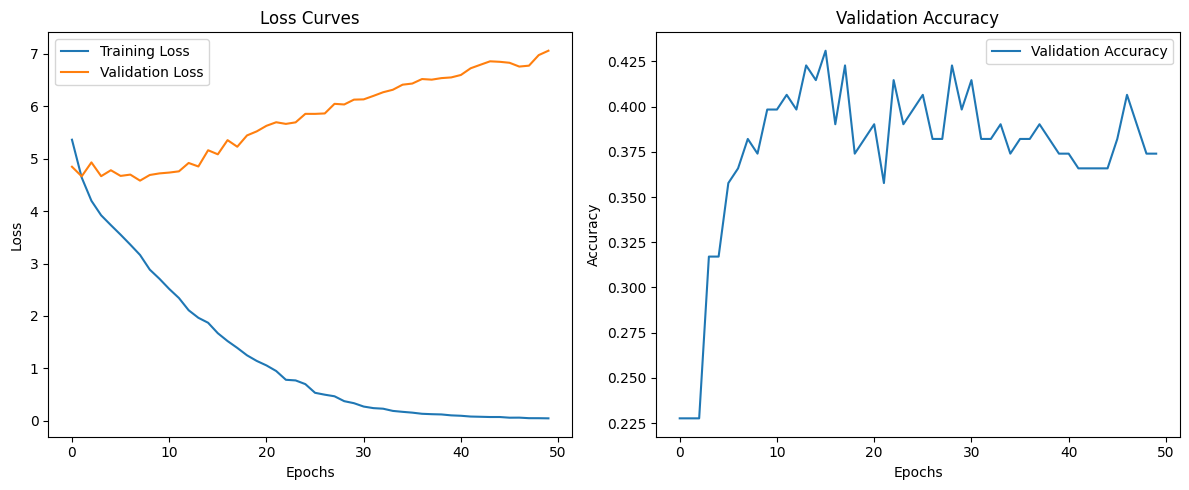


Sample English sentence: Le soleil se couche le soir
Reference French translation: The sun sets in the evening
Model translation: the coffee is hot
Source tokens: ['SOS', 'le', 'soleil', 'se', 'couche', 'le', 'soir', 'EOS']
Target tokens: ['SOS', 'the', 'coffee', 'is', 'hot', 'EOS']
Attention shape: torch.Size([4, 16])


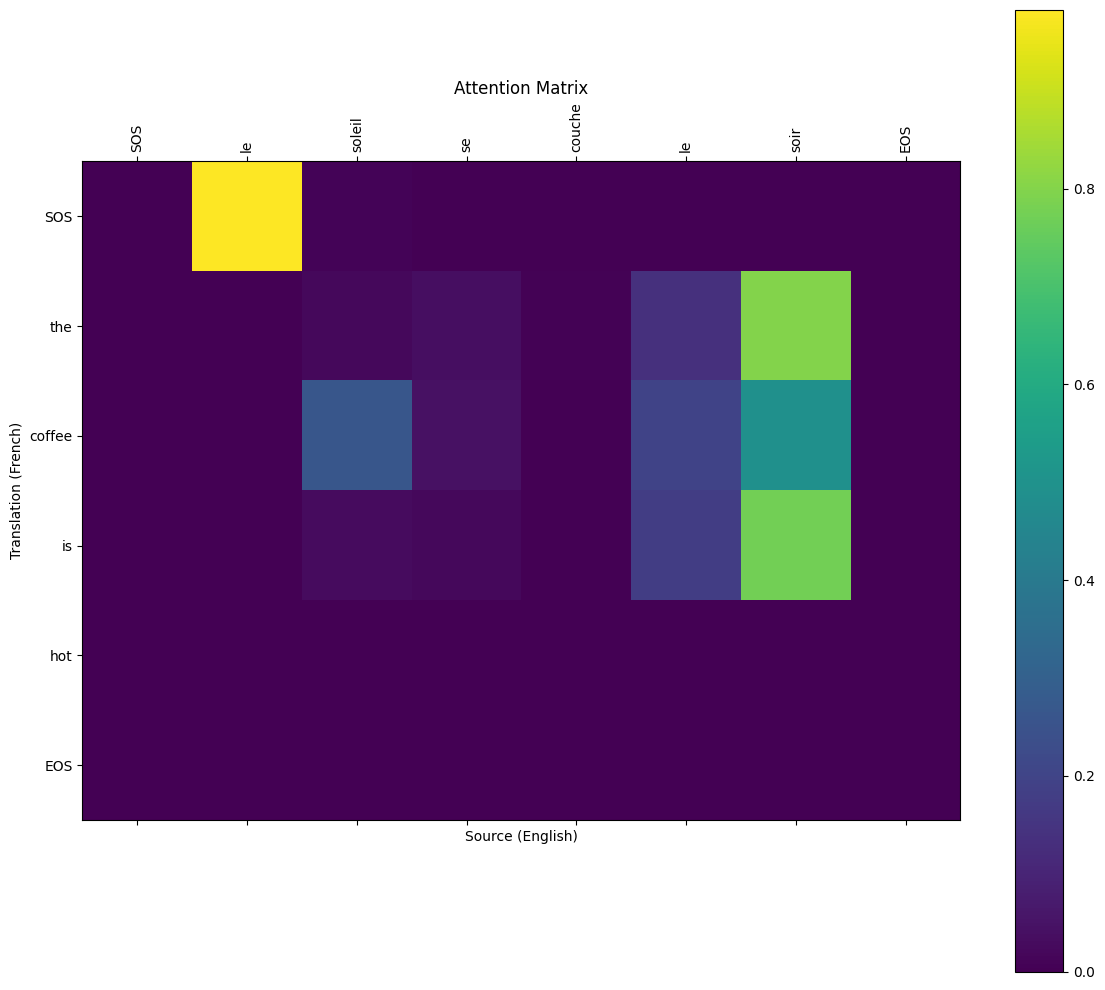


Token alignment:
SOS             → le
the             → soir
coffee          → soir
is              → soir
hot             → (no attention data)
EOS             → (no attention data)

Attention Visualization Details:
Source (English): SOS le soleil se couche le soir EOS
Translation (French): SOS the coffee is hot EOS

Training complete. Final metrics:
Final training loss: 0.0489
Final validation loss: 7.0569
Final validation accuracy: 37.40%


In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import re
import ast
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Parse the dataset
data_text = """("J'ai froid", "I am cold"),
    ("Tu es fatigué", "You are tired"),
    ("Il a faim", "He is hungry"),
    ("Elle est heureuse", "She is happy"),
    ("Nous sommes amis", "We are friends"),
    ("Ils sont étudiants", "They are students"),
    ("Le chat dort", "The cat is sleeping"),
    ("Le soleil brille", "The sun is shining"),
    ("Nous aimons la musique", "We love music"),
    ("Elle parle français couramment", "She speaks French fluently"),
    ("Il aime lire des livres", "He enjoys reading books"),
    ("Ils jouent au football chaque week-end", "They play soccer every weekend"),
    ("Le film commence à 19 heures", "The movie starts at 7 PM"),
    ("Elle porte une robe rouge", "She wears a red dress"),
    ("Nous cuisinons le dîner ensemble", "We cook dinner together"),
    ("Il conduit une voiture bleue", "He drives a blue car"),
    ("Ils visitent souvent des musées", "They visit museums often"),
    ("Le restaurant sert une délicieuse cuisine", "The restaurant serves delicious food"),
    ("Nous regardons des films le vendredi", "We watch movies on Fridays"),
    ("Il écoute de la musique en faisant du jogging", "He listens to music while jogging"),
    ("Ils voyagent autour du monde", "They travel around the world"),
    ("Le livre est sur la table", "The book is on the table"),
    ("Elle danse avec grâce", "She dances gracefully"),
    ("Nous célébrons les anniversaires avec un gâteau", "We celebrate birthdays with cake"),
    ("Il travaille dur tous les jours", "He works hard every day"),
    ("Ils parlent différentes langues", "They speak different languages"),
    ("Les fleurs fleurissent au printemps", "The flowers bloom in spring"),
    ("Elle écrit de la poésie pendant son temps libre", "She writes poetry in her free time"),
    ("Nous apprenons quelque chose de nouveau chaque jour", "We learn something new every day"),
    ("Le chien aboie bruyamment", "The dog barks loudly"),
    ("Il chante magnifiquement", "He sings beautifully"),
    ("Ils nagent dans la piscine", "They swim in the pool"),
    ("Les oiseaux gazouillent le matin", "The birds chirp in the morning"),
    ("Elle enseigne l'anglais à l'école", "She teaches English at school"),
    ("Nous prenons le petit déjeuner ensemble", "We eat breakfast together"),
    ("Il peint des paysages", "He paints landscapes"),
    ("Ils rient de la blague", "They laugh at the joke"),
    ("L'horloge tic-tac bruyamment", "The clock ticks loudly"),
    ("Elle court dans le parc", "She runs in the park"),
    ("Nous voyageons en train", "We travel by train"),
    ("Il écrit une lettre", "He writes a letter"),
    ("Ils lisent des livres à la bibliothèque", "They read books at the library"),
    ("Le bébé pleure", "The baby cries"),
    ("Elle étudie dur pour les examens", "She studies hard for exams"),
    ("Nous plantons des fleurs dans le jardin", "We plant flowers in the garden"),
    ("Il répare la voiture", "He fixes the car"),
    ("Ils boivent du café le matin", "They drink coffee in the morning"),
    ("Le soleil se couche le soir", "The sun sets in the evening"),
    ("Elle danse à la fête", "She dances at the party"),
    ("Nous jouons de la musique au concert", "We play music at the concert"),
    ("Il cuisine le dîner pour sa famille", "He cooks dinner for his family"),
    ("Ils étudient la grammaire française", "They study French grammar"),
    ("La pluie tombe doucement", "The rain falls gently"),
    ("Elle chante une chanson", "She sings a song"),
    ("Nous regardons un film ensemble", "We watch a movie together"),
    ("Il dort profondément", "He sleeps deeply"),
    ("Ils voyagent à Paris", "They travel to Paris"),
    ("Les enfants jouent dans le parc", "The children play in the park"),
    ("Elle se promène le long de la plage", "She walks along the beach"),
    ("Nous parlons au téléphone", "We talk on the phone"),
    ("Il attend le bus", "He waits for the bus"),
    ("Ils visitent la tour Eiffel", "They visit the Eiffel Tower"),
    ("Les étoiles scintillent la nuit", "The stars twinkle at night"),
    ("Elle rêve de voler", "She dreams of flying"),
    ("Nous travaillons au bureau", "We work in the office"),
    ("Il étudie l'histoire", "He studies history"),
    ("Ils écoutent la radio", "They listen to the radio"),
    ("Le vent souffle doucement", "The wind blows gently"),
    ("Elle nage dans l'océan", "She swims in the ocean"),
    ("Nous dansons au mariage", "We dance at the wedding"),
    ("Il gravit la montagne", "He climbs the mountain"),
    ("Ils font de la randonnée dans la forêt", "They hike in the forest"),
    ("Le chat miaule bruyamment", "The cat meows loudly"),
    ("Elle peint un tableau", "She paints a picture"),
    ("Nous construisons un château de sable", "We build a sandcastle"),
    ("Il chante dans le chœur", "He sings in the choir"),
    ("Ils font du vélo", "They ride bicycles"),
    ("Le café est chaud", "The coffee is hot"),
    ("Elle porte des lunettes", "She wears glasses"),
    ("Nous rendons visite à nos grands-parents", "We visit our grandparents"),
    ("Il joue de la guitare", "He plays the guitar"),
    ("Ils font du shopping", "They go shopping"),
    ("Le professeur explique la leçon", "The teacher explains the lesson"),
    ("Elle prend le train pour aller au travail", "She takes the train to work"),
    ("Nous faisons des biscuits", "We bake cookies"),
    ("Il se lave les mains", "He washes his hands"),
    ("Ils apprécient le coucher du soleil", "They enjoy the sunset"),
    ("La rivière coule calmement", "The river flows calmly"),
    ("Elle nourrit le chat", "She feeds the cat"),
    ("Nous visitons le musée", "We visit the museum"),
    ("Il répare son vélo", "He fixes his bicycle"),
    ("Ils peignent les murs", "They paint the walls"),
    ("Le bébé dort paisiblement", "The baby sleeps peacefully"),
    ("Elle attache ses lacets", "She ties her shoelaces"),
    ("Nous montons les escaliers", "We climb the stairs"),
    ("Il se rase le matin", "He shaves in the morning"),
    ("Ils mettent la table", "They set the table"),
    ("L'avion décolle", "The airplane takes off"),
    ("Elle arrose les plantes", "She waters the plants"),
    ("Nous pratiquons le yoga", "We practice yoga"),
    ("Il éteint la lumière", "He turns off the light"),
    ("Ils jouent aux jeux vidéo", "They play video games"),
    ("La soupe sent délicieusement bon", "The soup smells delicious"),
    ("Elle ferme la porte à clé", "She locks the door"),
    ("Nous profitons d'un pique-nique", "We enjoy a picnic"),
    ("Il vérifie ses emails", "He checks his email"),
    ("Ils vont à la salle de sport", "They go to the gym"),
    ("La lune brille intensément", "The moon shines brightly"),
    ("Elle attrape le bus", "She catches the bus"),
    ("Nous saluons nos voisins", "We greet our neighbors"),
    ("Il se peigne les cheveux", "He combs his hair"),
    ("Ils font un signe d'adieu", "They wave goodbye")"""

# Convert string to proper Python tuples
formatted_data = f"[{data_text}]"
formatted_data = formatted_data.replace("\n    ", "")
try:
    pairs = ast.literal_eval(formatted_data)
except:
    pairs = []
    pattern = r'\("([^"]+)", "([^"]+)"\)'
    matches = re.findall(pattern, data_text)
    pairs = [(french, english) for french, english in matches]

print(f"Total number of sentence pairs: {len(pairs)}")

# Data preprocessing
def normalize_string(s):
    s = s.lower().strip()
    s = re.sub(r"([.!?])", r" \1", s)
    return s

# Tokenize the sentences
def tokenize(sentence):
    return [word for word in normalize_string(sentence).split()]

# Calculate maximum sequence lengths for both languages
max_french_len = max([len(tokenize(pair[0])) for pair in pairs]) + 2  # +2 for SOS and EOS
max_english_len = max([len(tokenize(pair[1])) for pair in pairs]) + 2  # +2 for SOS and EOS

print(f"Max French sequence length: {max_french_len}")
print(f"Max English sequence length: {max_english_len}")

# Use a slightly larger max length to ensure we can handle all sequences
MAX_LENGTH = max(max_french_len, max_english_len) + 5  # Add a small buffer
print(f"Using max sequence length: {MAX_LENGTH}")

# Create vocabulary
class Lang:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "PAD", 1: "SOS", 2: "EOS"}
        self.n_words = 3  # Count PAD, SOS and EOS

    def add_sentence(self, sentence):
        for word in tokenize(sentence):
            self.add_word(word)

    def add_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

# Create language objects and tokenize the data
input_lang = Lang("french")
output_lang = Lang("english")

for french, english in pairs:
    input_lang.add_sentence(french)
    output_lang.add_sentence(english)

print(f"French vocabulary size: {input_lang.n_words}")
print(f"English vocabulary size: {output_lang.n_words}")

# Create dataset and dataloader
class TranslationDataset(Dataset):
    def __init__(self, pairs, input_lang, output_lang, max_length=MAX_LENGTH):
        self.pairs = pairs
        self.input_lang = input_lang
        self.output_lang = output_lang
        self.max_length = max_length
        
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        french_sentence, english_sentence = self.pairs[idx]
        
        # Convert sentences to indices
        french_indices = [input_lang.word2index.get(word, 0) for word in tokenize(french_sentence)]
        french_indices = [1] + french_indices + [2]  # Add SOS and EOS tokens
        
        english_indices = [output_lang.word2index.get(word, 0) for word in tokenize(english_sentence)]
        english_indices = [1] + english_indices + [2]  # Add SOS and EOS tokens
        
        # Pad sequences to max_length
        french_length = len(french_indices)
        english_length = len(english_indices)
        
        french_padded = french_indices + [0] * (self.max_length - french_length)
        english_padded = english_indices + [0] * (self.max_length - english_length)
        
        return {
            'french': torch.tensor(french_padded, dtype=torch.long),
            'french_length': torch.tensor(french_length, dtype=torch.long),
            'english': torch.tensor(english_padded, dtype=torch.long),
            'english_length': torch.tensor(english_length, dtype=torch.long)
        }

# Split the data into training and validation sets
train_pairs, val_pairs = train_test_split(pairs, test_size=0.2, random_state=42)

# Create datasets and dataloaders
train_dataset = TranslationDataset(train_pairs, input_lang, output_lang)
val_dataset = TranslationDataset(val_pairs, input_lang, output_lang)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Encoder model
class EncoderGRU(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.7):
        super(EncoderGRU, self).__init__()
        self.hidden_size = hidden_size
        
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input_seq, input_lengths, hidden=None):
        # input_seq: [batch_size, seq_len]
        embedded = self.dropout(self.embedding(input_seq))  # [batch_size, seq_len, hidden_size]
        
        # Pack padded sequence for RNN efficiency
        packed = nn.utils.rnn.pack_padded_sequence(embedded, input_lengths.cpu(), batch_first=True, enforce_sorted=False)
        
        outputs, hidden = self.gru(packed, hidden)
        
        # Unpack the sequence
        outputs, _ = nn.utils.rnn.pad_packed_sequence(outputs, batch_first=True, padding_value=0.0, total_length=MAX_LENGTH)
        
        return outputs, hidden

# Attention mechanism
class Attention(nn.Module):
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)
        
    def forward(self, hidden, encoder_outputs):
        # hidden: [batch_size, hidden_size]
        # encoder_outputs: [batch_size, src_seq_len, hidden_size]
        
        src_len = encoder_outputs.size(1)
        
        # Repeat hidden to match encoder_outputs dimensions
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        
        # Calculate energy
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim=2)))
        
        # Calculate attention weights
        attention = self.v(energy).squeeze(2)
        
        # Mask attention weights where encoder_outputs are just padding
        mask = (encoder_outputs.sum(dim=2) == 0)
        attention = attention.masked_fill(mask, -1e10)
        
        # Apply softmax to get attention weights
        return F.softmax(attention, dim=1)

# Decoder model with attention
class DecoderGRU(nn.Module):
    def __init__(self, output_size, hidden_size, dropout=0.7):
        super(DecoderGRU, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.attention = Attention(hidden_size)
        self.gru = nn.GRU((hidden_size * 2), hidden_size, batch_first=True)
        self.out = nn.Linear(hidden_size * 2, output_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input_seq, hidden, encoder_outputs):
        # input_seq: [batch_size, 1]
        # hidden: [1, batch_size, hidden_size]
        # encoder_outputs: [batch_size, src_seq_len, hidden_size]
        
        input_seq = input_seq.unsqueeze(1) if input_seq.dim() == 1 else input_seq  # [batch_size, 1]
        
        embedded = self.dropout(self.embedding(input_seq))  # [batch_size, 1, hidden_size]
        
        # Calculate attention weights
        attn_weights = self.attention(hidden.squeeze(0), encoder_outputs)  # [batch_size, src_seq_len]
        
        # Create context vector by multiplying attention weights with encoder outputs
        context = attn_weights.unsqueeze(1).bmm(encoder_outputs)  # [batch_size, 1, hidden_size]
        
        # Combine embedded input and context vector
        rnn_input = torch.cat((embedded, context), dim=2)  # [batch_size, 1, hidden_size*2]
        
        # Get GRU output
        output, hidden = self.gru(rnn_input, hidden)  # output: [batch_size, 1, hidden_size]
        
        # Combine output and context for prediction
        output = torch.cat((output.squeeze(1), context.squeeze(1)), dim=1)  # [batch_size, hidden_size*2]
        
        prediction = self.out(output)  # [batch_size, output_size]
        
        return prediction, hidden, attn_weights

# Seq2Seq model combining Encoder and Decoder
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, src, src_lengths, tgt, teacher_forcing_ratio=0.5):
        # src: [batch_size, src_seq_len]
        # tgt: [batch_size, tgt_seq_len]
        
        batch_size = src.size(0)
        tgt_len = tgt.size(1)
        tgt_vocab_size = self.decoder.output_size
        src_len = src.size(1)
        
        # Tensor to store decoder outputs
        outputs = torch.zeros(batch_size, tgt_len, tgt_vocab_size).to(self.device)
        
        # Tensor to store attention weights for visualization (same size as source sequence)
        attentions = torch.zeros(batch_size, tgt_len, src_len).to(self.device)
        
        # Encode the source sequence
        encoder_outputs, hidden = self.encoder(src, src_lengths)
        
        # First input to the decoder is the < SOS > token
        decoder_input = tgt[:, 0]
        
        # Teacher forcing: use real target outputs as each next input
        use_teacher_forcing = True if random.random() < teacher_forcing_ratio else False
        
        # Decode one step at a time
        for t in range(1, tgt_len):
            output, hidden, attn_weights = self.decoder(decoder_input, hidden, encoder_outputs)
            
            outputs[:, t, :] = output
            attentions[:, t, :] = attn_weights
            
            # Decide if we use teacher forcing or not
            if use_teacher_forcing:
                decoder_input = tgt[:, t]  # Use real target as next input
            else:
                # Use predicted output as next input
                top1 = output.argmax(1)
                decoder_input = top1
        
        return outputs, attentions

# Initialize the model
def init_model(input_size, output_size, hidden_size):
    encoder = EncoderGRU(input_size, hidden_size)
    decoder = DecoderGRU(output_size, hidden_size)
    model = Seq2Seq(encoder, decoder, device)
    return model.to(device)

# Loss function and optimizer
hidden_size = 256
model = init_model(input_lang.n_words, output_lang.n_words, hidden_size)
criterion = nn.CrossEntropyLoss(ignore_index=0)  # Ignore padding index
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train(model, iterator, optimizer, criterion, clip=1.0):
    model.train()
    epoch_loss = 0
    
    for batch in iterator:
        src = batch['french'].to(device)
        tgt = batch['english'].to(device)
        src_lengths = batch['french_length']
        
        optimizer.zero_grad()
        
        output, _ = model(src, src_lengths, tgt)
        
        # output: [batch_size, tgt_len, output_dim]
        # tgt: [batch_size, tgt_len]
        
        output_dim = output.shape[-1]
        
        # Reshape output and target for loss calculation
        output = output[:, 1:].reshape(-1, output_dim)
        tgt = tgt[:, 1:].reshape(-1)
        
        loss = criterion(output, tgt)
        loss.backward()
        
        # Clip gradients to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
    
    return epoch_loss / len(iterator)

# Evaluation function
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    correct_predictions = 0
    total_tokens = 0
    attention_matrix = None
    
    with torch.no_grad():
        for batch_idx, batch in enumerate(iterator):
            src = batch['french'].to(device)
            tgt = batch['english'].to(device)
            src_lengths = batch['french_length']
            
            output, attention = model(src, src_lengths, tgt, 0)  # No teacher forcing
            
            # Save attention from first batch of last evaluation
            if batch_idx == 0:
                attention_matrix = attention
            
            # output: [batch_size, tgt_len, output_dim]
            # tgt: [batch_size, tgt_len]
            
            output_dim = output.shape[-1]
            
            # Reshape output and target for loss calculation
            output_flat = output[:, 1:].reshape(-1, output_dim)
            tgt_flat = tgt[:, 1:].reshape(-1)
            
            loss = criterion(output_flat, tgt_flat)
            
            # Calculate accuracy (ignore padding tokens)
            pred = output[:, 1:].argmax(dim=2)
            non_pad = tgt[:, 1:] != 0
            correct = (pred == tgt[:, 1:]) & non_pad
            correct_predictions += correct.sum().item()
            total_tokens += non_pad.sum().item()
            
            epoch_loss += loss.item()
    
    accuracy = correct_predictions / total_tokens if total_tokens > 0 else 0
    return epoch_loss / len(iterator), accuracy, attention_matrix

# Training loop
n_epochs = 50
best_valid_loss = float('inf')

train_losses = []
val_losses = []
val_accuracies = []
final_attention = None

for epoch in range(n_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc, attention = evaluate(model, val_loader, criterion)
    
    train_losses.append(train_loss)
    val_losses.append(valid_loss)
    val_accuracies.append(valid_acc)
    
    if epoch == n_epochs - 1:  # Save attention from last epoch
        final_attention = attention
    
    print(f'Epoch: {epoch+1}/{n_epochs}')
    print(f'\tTrain Loss: {train_loss:.4f}')
    print(f'\tVal. Loss: {valid_loss:.4f}')
    print(f'\tVal. Accuracy: {valid_acc*100:.2f}%')
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'french_english_translation_model.pt')

# Plot training curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.savefig('training_curves.png')
plt.show()

# Function to display attention
def display_attention(sentence, translation, attention, inp_lang, out_lang):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    # Get token lists (including special tokens)
    src_tokens = [inp_lang.index2word[i] for i in sentence]
    tgt_tokens = [out_lang.index2word[i] for i in translation]
    
    # Print debug info
    print(f"Source tokens: {src_tokens}")
    print(f"Target tokens: {tgt_tokens}")
    print(f"Attention shape: {attention.shape}")
    
    # Create a new attention matrix that matches our token dimensions
    # If attention is smaller than our tokens, we'll use what we have
    # If attention is larger, we'll truncate
    attention_matrix = torch.zeros(len(tgt_tokens), len(src_tokens))
    min_tgt_len = min(attention.size(0), len(tgt_tokens))
    min_src_len = min(attention.size(1), len(src_tokens))
    
    # Copy the available attention values
    attention_matrix[:min_tgt_len, :min_src_len] = attention[:min_tgt_len, :min_src_len]
    
    # Convert to numpy for plotting
    attention_np = attention_matrix.cpu().numpy()
    
    # Plot the attention matrix
    cax = ax.matshow(attention_np, cmap='viridis')
    fig.colorbar(cax)
    
    # Set x-axis (source) labels
    ax.set_xticks(range(len(src_tokens)))
    ax.set_xticklabels(src_tokens, rotation=90)
    
    # Set y-axis (target) labels
    ax.set_yticks(range(len(tgt_tokens)))
    ax.set_yticklabels(tgt_tokens)
    
    # Add grid to align with cells
    ax.grid(False)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    # Add labels and title
    plt.xlabel('Source (English)')
    plt.ylabel('Translation (French)')
    plt.title('Attention Matrix')
    
    plt.tight_layout()
    plt.savefig('attention_visualization.png')
    plt.show()
    
    # Print token alignment to help debug
    print("\nToken alignment:")
    for i, tgt in enumerate(tgt_tokens):
        print(f"{tgt:15} → ", end="")
        # Find the max attention weight for this target token
        if i < min_tgt_len:
            max_idx = attention[i, :min_src_len].argmax().item()
            if max_idx < len(src_tokens):
                print(f"{src_tokens[max_idx]}")
            else:
                print("(out of bounds)")
        else:
            print("(no attention data)")

# Translate_sentence function remains the same
def translate_sentence(sentence, src_lang, tgt_lang, model, device, max_len=MAX_LENGTH):
    model.eval()
    
    # Tokenize the sentence
    tokens = tokenize(sentence)
    
    # Convert to indices
    indices = [src_lang.word2index.get(token, 0) for token in tokens]
    
    # Add SOS and EOS tokens
    indices = [1] + indices + [2]
    
    # Convert to tensor
    src_tensor = torch.LongTensor(indices).unsqueeze(0).to(device)
    src_length = torch.LongTensor([len(indices)])
    
    # Get encoder outputs
    with torch.no_grad():
        encoder_outputs, hidden = model.encoder(src_tensor, src_length)
    
    # Start with SOS token for decoder input
    tgt_indices = [1]  # SOS token
    
    attentions = torch.zeros(max_len, encoder_outputs.size(1)).to(device)
    
    for i in range(max_len):
        tgt_tensor = torch.LongTensor([tgt_indices[-1]]).to(device)
        
        with torch.no_grad():
            output, hidden, attention = model.decoder(tgt_tensor, hidden, encoder_outputs)
        
        attentions[i] = attention
        
        pred_token = output.argmax(1).item()
        
        if pred_token == 2:  # EOS token
            break
        
        tgt_indices.append(pred_token)
    
    tgt_tokens = [tgt_lang.index2word[i] for i in tgt_indices]
    
    return tgt_tokens, attentions[:len(tgt_indices)-1]

# Replace the attention visualization code with this new version
# Choose a specific sample from validation set
sample_idx = 3  # Choose any fixed index you prefer
sample_english, sample_french = val_pairs[sample_idx]

print(f"\nSample English sentence: {sample_english}")
print(f"Reference French translation: {sample_french}")

# Translate the sentence
translation_tokens, attention_weights = translate_sentence(
    sample_english, input_lang, output_lang, model, device)

# Remove SOS token
predicted_translation = ' '.join(translation_tokens[1:])
print(f"Model translation: {predicted_translation}")

# Prepare sentence for attention visualization
english_indices = [input_lang.word2index.get(word, 0) for word in tokenize(sample_english)]
english_indices = [1] + english_indices + [2]  # Add SOS and EOS

french_indices = [output_lang.word2index.get(word, 0) for word in tokenize(predicted_translation)]
french_indices = [1] + french_indices + [2]  # Add SOS and EOS

# Display attention visualization
display_attention(english_indices, french_indices, attention_weights, input_lang, output_lang)

print("\nAttention Visualization Details:")
print(f"Source (English): {' '.join([input_lang.index2word[i] for i in english_indices])}")
print(f"Translation (French): {' '.join([output_lang.index2word[i] for i in french_indices])}")

print("\nTraining complete. Final metrics:")
print(f"Final training loss: {train_losses[-1]:.4f}")
print(f"Final validation loss: {val_losses[-1]:.4f}")
print(f"Final validation accuracy: {val_accuracies[-1]*100:.2f}%")